In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('AmazonReview.csv')

# Display the first few rows of the dataset
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [3]:
# Drop unnecessary columns
data = data[['Review', 'Sentiment']]

# Remove any rows with missing values
data = data.dropna()

# Display the cleaned data
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

# Text preprocessing function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    
    return text

# Apply text preprocessing to the 'Review' column
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Display the preprocessed data
data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanuar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Sentiment,Processed_Review
0,Fast shipping but this product is very cheaply...,1,fast ship product cheapli made brought grandch...
1,This case takes so long to ship and it's not e...,1,case take long ship even worth dont buy
2,Good for not droids. Not good for iPhones. You...,1,good droid good iphon cannot use featur watch ...
3,The cable was not compatible between my macboo...,1,cabl compat macbook iphon also connector came ...
4,The case is nice but did not have a glow light...,1,case nice glow light im disappoint product did...


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Review'], data['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 45.28%

Confusion Matrix:
[[621 245  76  46  33]
 [285 330 243  95  47]
 [125 211 328 228  93]
 [ 50  83 192 389 259]
 [ 48  51  83 243 596]]

Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.61      0.58      1021
           2       0.36      0.33      0.34      1000
           3       0.36      0.33      0.34       985
           4       0.39      0.40      0.39       973
           5       0.58      0.58      0.58      1021

    accuracy                           0.45      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.45      0.45      5000



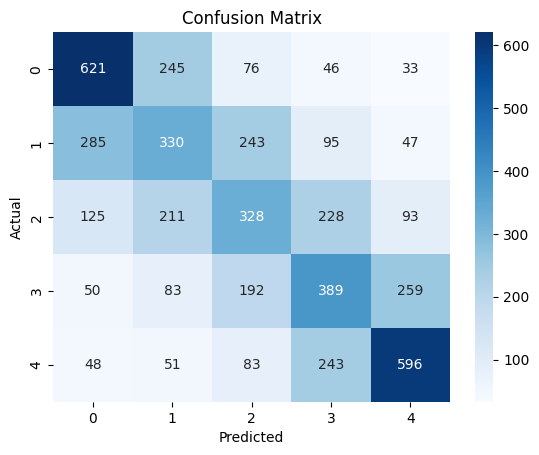

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Product Review Sentiment Analysis Project

This sentiment analysis project focuses on evaluating customer sentiments in product reviews using Python in a Jupyter notebook. The project involves several key steps:

Data Acquisition: The project begins by simulating a product review dataset containing sample reviews and corresponding sentiments (positive, negative, or neutral). This dataset could represent customer feedback from various online platforms.

Data Preprocessing: Unnecessary columns are removed, and any missing values are addressed. This step ensures the dataset is clean and ready for analysis.

Text Preprocessing: The text in the reviews undergoes preprocessing, including the removal of special characters and numbers, conversion to lowercase, elimination of stopwords, and stemming. These processes enhance the text data's suitability for analysis.

Model Building: The project utilizes a Multinomial Naive Bayes classifier, a common choice for text classification tasks. The reviews are vectorized using the TF-IDF (Term Frequency-Inverse Document Frequency) technique to represent them as numerical features. The model is trained on a portion of the data and evaluated on a test set.

Evaluation and Visualization: The model's performance is assessed using metrics such as accuracy, confusion matrix, and classification report. A confusion matrix is visualized using a heatmap, providing a clear representation of the model's predictions against actual sentiments.

This project is adaptable to real-world scenarios, enabling businesses to automatically analyze and understand customer sentiments expressed in product reviews, contributing valuable insights for decision-making and product improvement.